# K-Means Clustering with scikit-learn

We are going to use the implementation for k-means from scikit-learn, see [here](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.fit) for a documentation. 

In [1]:
from sklearn.cluster import KMeans

When using k-means from scikit-learn, we recommend you that your data be stored as a numpy array. Create it or convert your data into a numpy array as follows.

In [5]:
import numpy as np

#create a numpy array
X = np.array([[1, 2], [1, 4], [1, 0],[4, 2], [4, 4], [4, 0]])

#convert a list to a numpy array
a=[]
for i in range(0,10):
    p=[i,2*i]
    a.append(p)

Y=np.array(a, dtype='float32')


The following execute the k-means algorithm on the points in X. Make sure you understand the parameters see [here](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.fit)

In [6]:
kmeans = KMeans(init='random', n_clusters=2, max_iter=10000, n_init=100).fit(X)

The following code shows for each data points its cluster (0 or 1)

In [7]:
kmeans.labels_

array([1, 1, 1, 0, 0, 0])

The following code computes the clusters for the points [0,0] and [4,4]. In this case, [0,0] is placed in cluster labeled 0 and [4,4] in the cluster labeled 1.

In [3]:
kmeans.predict([[0, 0], [4, 4]])

array([0, 1], dtype=int32)

The following code shows the centroids (in this case called centers ) of the two clusters.

In [4]:
kmeans.cluster_centers_

array([[1., 2.],
       [4., 2.]])

In [8]:
import math # importe un package
import numpy as np # importe un package sous un nom particulier
from sklearn import linear_model # importe tout un module
import scipy
import matplotlib.pyplot as plt
import os
import pandas as pd
import urllib
import zipfile
import sys
import statsmodels.api as sm
import pylab as py
import seaborn as sns
np.random.seed(0)

In [24]:
df=pd.read_csv('data.csv')
print(df.info())
print("This dataframe is duplicated ? {}".format(df.duplicated().sum()))
df.head(5)
stock_data = df.values[:,1:]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   StockName  30 non-null     object 
 1   1/28/2011  30 non-null     float64
 2   4/29/2011  30 non-null     float64
 3   5/20/2011  30 non-null     float64
 4   4/1/2011   30 non-null     float64
 5   5/27/2011  30 non-null     float64
 6   6/17/2011  30 non-null     float64
 7   4/15/2011  30 non-null     float64
 8   2/18/2011  30 non-null     float64
 9   3/18/2011  30 non-null     float64
 10  3/11/2011  30 non-null     float64
 11  6/24/2011  30 non-null     float64
 12  2/11/2011  30 non-null     float64
 13  6/10/2011  30 non-null     float64
 14  5/6/2011   30 non-null     float64
 15  6/3/2011   30 non-null     float64
 16  1/14/2011  30 non-null     float64
 17  4/8/2011   30 non-null     float64
 18  4/21/2011  30 non-null     float64
 19  3/4/2011   30 non-null     float64
 20  3/25/2011  3

1. You should run the k-means algorithm on the stock data. Compute the
sum of squared errors (SSE) for the clustering you obtained, while selecting
the initial centroids randomly and using the default values for the other
parameters.

In [29]:
kmeans = KMeans(init = 'random', n_clusters=8).fit(stock_data)
print("Cluster centers: {}".format(kmeans.cluster_centers_))
print("Cluster SSE: {}".format(kmeans.inertia_))

Cluster centers: [[ -4.5614      -0.324675    -2.60723     -0.372578     1.91805
   -1.92837     -5.03704     -0.13541     -1.54278      1.41044
   -0.661001     1.79187     -3.39893     -0.404531    -4.97051
    7.62174      0.597015    -2.22399     -1.05116     -6.05634
    4.23049      2.88809     -1.25174     -2.85016     -5.50398   ]
 [ -0.702753     1.08158463   0.67807963   1.65917138  -0.37963537
    1.21951158   2.07246088   0.67314484  -2.21199988   0.24327275
   -0.21860925   0.8146325   -1.14316638  -0.45871061  -2.317355
    1.55720862  -0.09702186   0.76830902   0.12406675   1.82377287
    0.64209775  -1.82141362  -1.19991588   1.61432225   0.70476113]
 [ -0.981997     5.11278     -0.71977     -0.195886     2.14739
    0.896414    -0.0973236    1.96599      3.75321     -0.86558
   -0.049776    -2.28334     -3.41018     -2.79092     -0.761905
    0.658617    -0.437956    -2.60827      3.7467       0.147638
    6.10225      3.61582     -0.105932     1.89966      0.0544959 ]

2. You should then try to decrease the SSE as much as possible (while keeping
k = 8) by changing some of the parameters accordingly. To this end, select
two parameters that you think should impact the results the most. For
each parameter try to understand: a) how do you expect that changing
that parameter would affect the results (increasing its value means better
or worse results) b) whether increasing or decreasing the value of the
parameter should always improve the results or not necessarily

In [60]:
diff = []

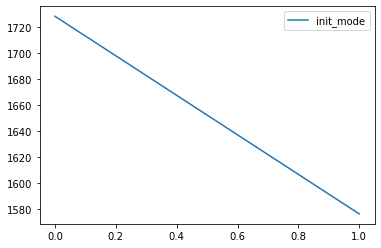

diff = 76.16750478893823


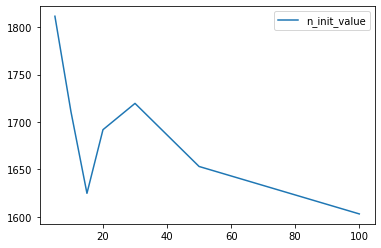

diff = 123.71229700790946


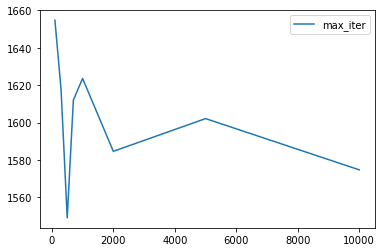

diff = 52.42272948187406


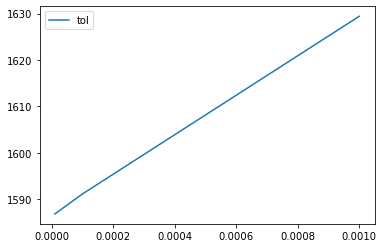

diff = 26.946380103474894


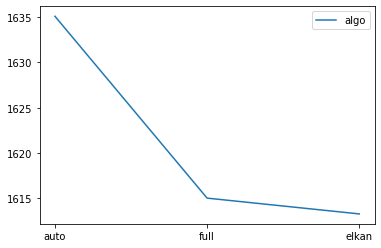

diff = 13.956195680642622


In [71]:
init_list = ['random','k-means++']
n_init_list = [5,10,15,20,30,50,100]
#Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.
max_iter_list= [100,300,500,700,1000,2000,5000,10000]
#Maximum number of iterations of the k-means algorithm for a single run.[100,500,700,1000,2000]
tol_list = [1e-3,1e-4,1e-5]
#Relative tolerance with regards to Frobenius norm of the difference in the cluster centers of two consecutive iterations to declare convergence.
algorithm_list= ['auto', 'full', 'elkan']

init_mode = init_list[1]
n_init_value = n_init_list[1]
max_iter_value = max_iter_list[1]
algo = algorithm_list[1]
tol_value = tol_list[1]

sse = []
for init_mode in init_list:
#for n_init_value in n_init_list:
#for max_iter_value in max_iter_list:
#for tol_value in tol_list: 
#for algo in algorithm_list:
        kmeans = KMeans(init = init_mode, n_clusters=8,n_init = n_init_value, max_iter = max_iter_value, tol = tol_value, algorithm = algo).fit(stock_data)
        sse.append(kmeans.inertia_)
        #print("Cluster SSE: {} of init_mode = {}, n_init = {}， max_iter = {}, tol = {}, algorithm = {}".format(kmeans.inertia_,init_mode, n_init_value,max_iter_value,tol_value,algo))
plt.plot(range(len(init_list)),sse,label = "init_mode")
plt.legend()
plt.show()
print("diff = {}".format(np.max(sse)-np.mean(sse)))

sse = []
init_mode = init_list[0]
for n_init_value in n_init_list:
    kmeans = KMeans(init = init_mode, n_clusters=8,n_init = n_init_value, max_iter = max_iter_value, tol = tol_value, algorithm = algo).fit(stock_data)
    sse.append(kmeans.inertia_)
plt.plot(n_init_list,sse,label = "n_init_value")
plt.legend()
plt.show()
print("diff = {}".format(np.max(sse)-np.mean(sse)))
n_init_value = n_init_list[-1]

sse = []
for max_iter_value in max_iter_list:
    kmeans = KMeans(init = init_mode, n_clusters=8,n_init = n_init_value, max_iter = max_iter_value, tol = tol_value, algorithm = algo).fit(stock_data)
    sse.append(kmeans.inertia_)
plt.plot(max_iter_list,sse,label = "max_iter")
plt.legend()
plt.show()
print("diff = {}".format(np.max(sse)-np.mean(sse)))
max_iter_value = max_iter_list[-1]

sse = []
for tol_value in tol_list: 
    kmeans = KMeans(init = init_mode, n_clusters=8,n_init = n_init_value, max_iter = max_iter_value, tol = tol_value, algorithm = algo).fit(stock_data)
    sse.append(kmeans.inertia_)
plt.plot(tol_list,sse,label = "tol")
plt.legend()
plt.show()
print("diff = {}".format(np.max(sse)-np.mean(sse)))
tol_value = tol_list[-1]

sse = []
for algo in algorithm_list: 
    kmeans = KMeans(init = init_mode, n_clusters=8,n_init = n_init_value, max_iter = max_iter_value, tol = tol_value, algorithm = algo).fit(stock_data)
    sse.append(kmeans.inertia_)
plt.plot(algorithm_list,sse,label = "algo")
plt.legend()
plt.show()
print("diff = {}".format(np.max(sse)-np.mean(sse)))
algo = algorithm_list[]

difference of init_mode = Kmeans++好
max_iteration 越大不一定越好



In [115]:
kmeans = KMeans(init = init_mode, n_clusters=8,n_init = n_init_value, max_iter = max_iter_list[0], tol = tol_value, algorithm = algo).fit(stock_data)
print(kmeans.inertia_)

1613.7703895240059


3. Then look at the clustering you obtained and try to label each cluster
with a topic. For example: cluster of technology stocks, oil stocks, etc.
Don’t expect your clustering to be perfect. In particular, you might have different kinds of stocks in a given cluster, while you might not be able to
label all clusters. It is fine to describe a cluster as a technology cluster if
most of the stocks deal with technology, for example.

In [117]:
labels = kmeans.labels_
centers = kmeans.cluster_centers_
X = kmeans.fit_transform(stock_data)
colors = ['b','g','r','k','c','m','y','#e24fff']

In [118]:
for i in range(30):
    print(df.values[i,0],labels[i])

American Express 1
Boeing 4
Chevron 4
Cisco Systems 7
DuPont 3
Kraft 1
Caterpillar 3
Bank of America 5
Verizon 1
Microsoft 2
IBM 2
The Home Depot 2
Walt Disney 4
Procter & Gamble 1
Alcoa 0
Intel 2
Hewlett-Packard 6
Wal-Mart 2
General Electric 2
AT&T 1
Merck 1
Pfizer 4
United Technologies 2
ExxonMobil 4
Travelers 2
JPMorgan Chase 5
McDonalds 1
Coca-Cola 1
3M 2
Johnson & Johnson 2


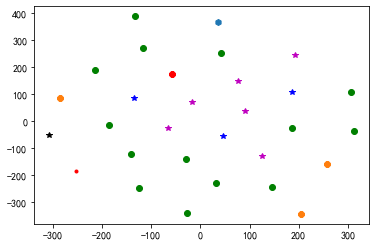

<Figure size 432x288 with 0 Axes>

In [144]:
kmeans = KMeans(init = init_mode, n_clusters=8,n_init = n_init_value, max_iter = max_iter_list[0], tol = tol_value, algorithm = algo).fit(stock_data)
kmeans.fit(stock_data)

r = pd.concat([df, pd.Series(kmeans.labels_, index=df.index)], axis=1)
r.columns = list(df.columns) + [u'聚类类别']

from sklearn.manifold import TSNE
t_sne = TSNE()
t_sne.fit(stock_data)
t_sne = pd.DataFrame(t_sne.embedding_, index=df.index)

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
dd = t_sne[r[u'聚类类别'] == 0]
plt.plot(dd[0], dd[1], 'r.')
dd = t_sne[r[u'聚类类别'] == 1]
plt.plot(dd[0], dd[1], 'go')
dd = t_sne[r[u'聚类类别'] == 2]
plt.plot(dd[0], dd[1], 'b*')
dd = t_sne[r[u'聚类类别'] == 3]
plt.plot(dd[0], dd[1], "r8")
dd = t_sne[r[u'聚类类别'] == 4]
plt.plot(dd[0], dd[1], 'k*')
dd = t_sne[r[u'聚类类别'] == 5]
plt.plot(dd[0], dd[1], 'm*')
dd = t_sne[r[u'聚类类别'] == 6]
plt.plot(dd[0], dd[1], "h")
dd = t_sne[r[u'聚类类别'] == 7]
plt.plot(dd[0], dd[1], "8")
plt.show()
plt.clf()

4. implement the k-means++ algorithm, that is, the algorithm that selects
the initial centroids in a more clever way than random. To this end, we
recommend to use a pseudo-random number generator and to partition
the interval [0; 1] into n \smaller" intervals, where n is the number of
input points so that 1) each interval correspond to one input point; 2) the
probability that a random number falls into one of the smaller intervals
is equal to the probability of selecting the corresponding input point in
k-means++.